In [32]:
import pandas as pd 
#import numpy as np
# only Numpy 1.25 works 
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv("housing.csv")

In [34]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [35]:
data.info()
#some values are missing in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [36]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [37]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']


In [38]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [39]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17310,-119.50,34.35,39.0,308.0,38.0,59.0,21.0,11.7794,NEAR OCEAN,500001.0
10835,-117.92,33.68,25.0,2017.0,454.0,1024.0,428.0,4.4732,<1H OCEAN,245600.0
9294,-122.51,38.00,17.0,2449.0,536.0,1157.0,543.0,3.9519,NEAR BAY,274200.0
16489,-121.18,38.07,21.0,2333.0,377.0,1073.0,332.0,4.8125,INLAND,161100.0
18103,-122.04,37.30,25.0,2366.0,417.0,1076.0,398.0,6.9238,<1H OCEAN,345900.0
...,...,...,...,...,...,...,...,...,...,...
1170,-121.58,39.51,24.0,1865.0,372.0,1087.0,385.0,1.6389,INLAND,56700.0
6998,-118.04,33.95,36.0,2722.0,515.0,1390.0,486.0,3.8214,<1H OCEAN,178500.0
3057,-119.33,35.59,20.0,3085.0,691.0,2645.0,676.0,1.7868,INLAND,54100.0
13600,-117.25,34.16,37.0,1709.0,278.0,744.0,274.0,3.7188,INLAND,116600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

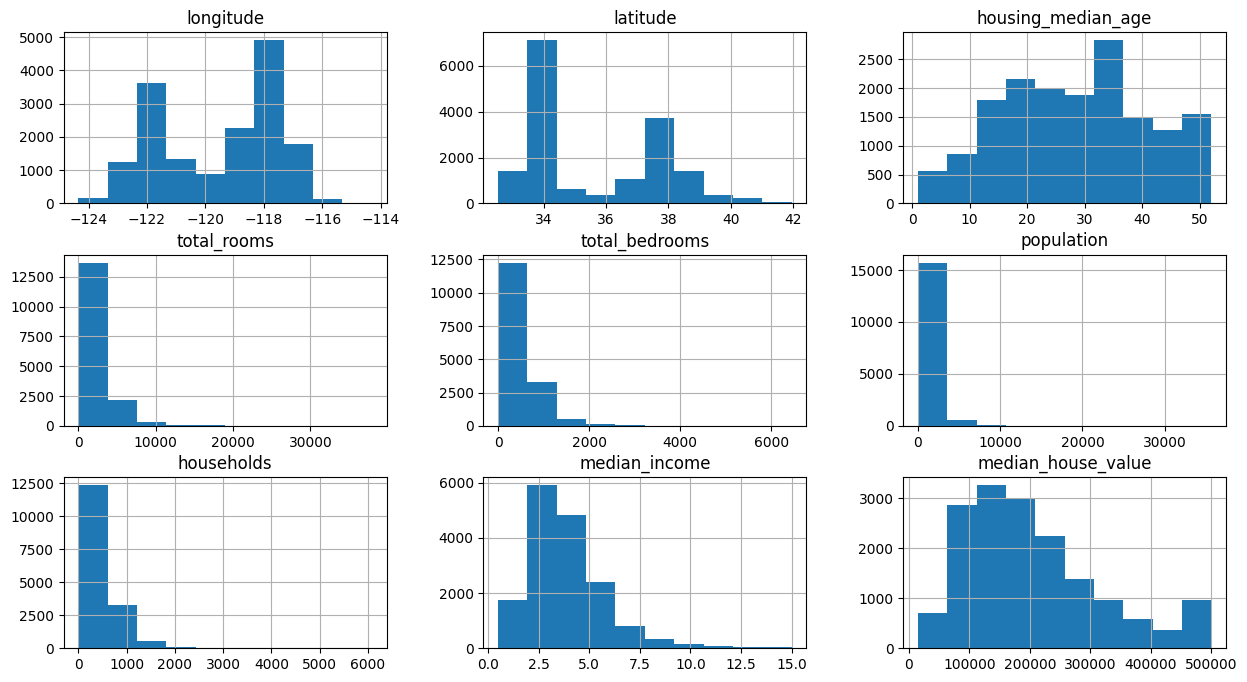

In [42]:
train_data.hist(figsize=(15,8))

In [43]:
#taking out the ocean proximity one so that we don't have any issues with trynna get stats from an object variable
train_data.loc[:, train_data.columns != 'ocean_proximity'].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923812,-0.105386,0.045998,0.067263,0.099280,0.053452,-0.012593,-0.046336
latitude,-0.923812,1.000000,0.009487,-0.037931,-0.065813,-0.108818,-0.070165,-0.083271,-0.144164
housing_median_age,-0.105386,0.009487,1.000000,-0.363819,-0.324380,-0.298954,-0.306558,-0.121607,0.099695
total_rooms,0.045998,-0.037931,-0.363819,1.000000,0.930601,0.857187,0.919227,0.204320,0.140343
total_bedrooms,0.067263,-0.065813,-0.324380,0.930601,1.000000,0.877035,0.979821,-0.001854,0.056060
population,0.099280,-0.108818,-0.298954,0.857187,0.877035,1.000000,0.906645,0.009839,-0.018889
households,0.053452,-0.070165,-0.306558,0.919227,0.979821,0.906645,1.000000,0.019117,0.071055
median_income,-0.012593,-0.083271,-0.121607,0.204320,-0.001854,0.009839,0.019117,1.000000,0.689570
median_house_value,-0.046336,-0.144164,0.099695,0.140343,0.056060,-0.018889,0.071055,0.689570,1.000000


<Axes: >

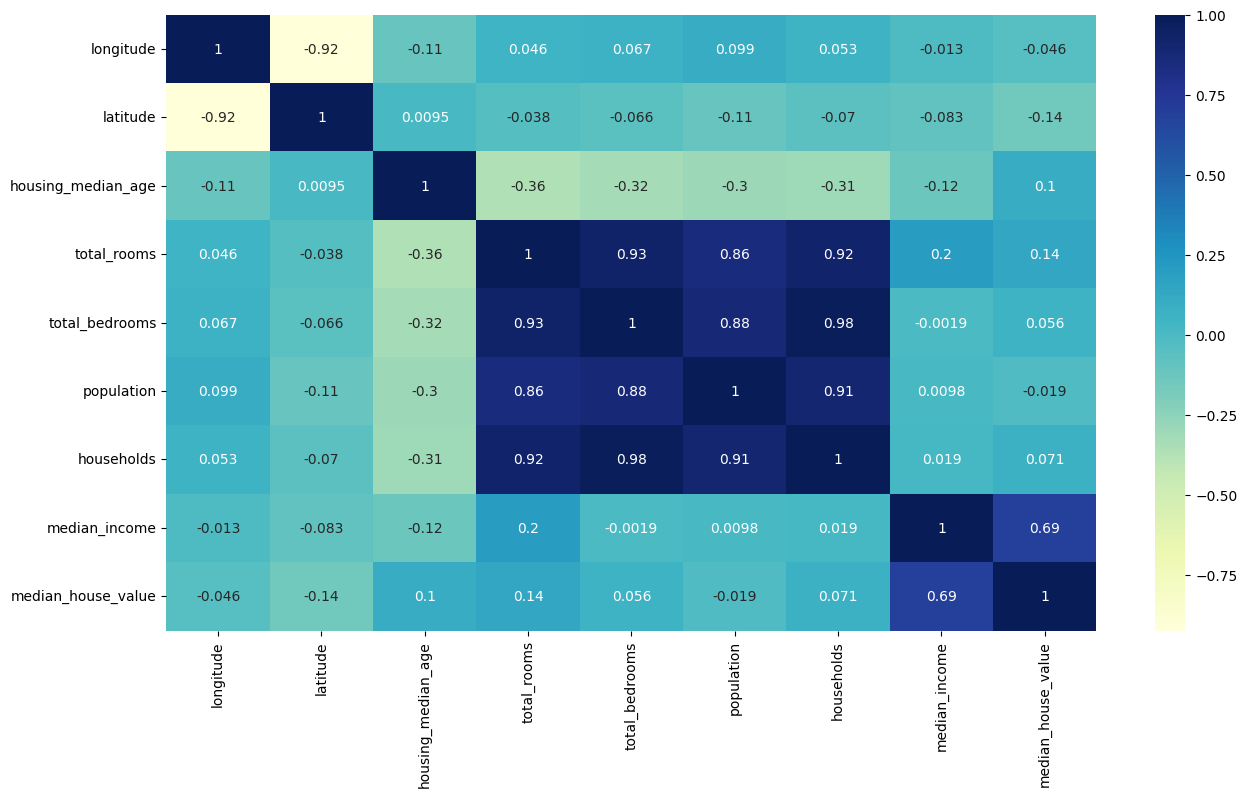

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns != 'ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

In [45]:
import numpy as np
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+ 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['total_rooms'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

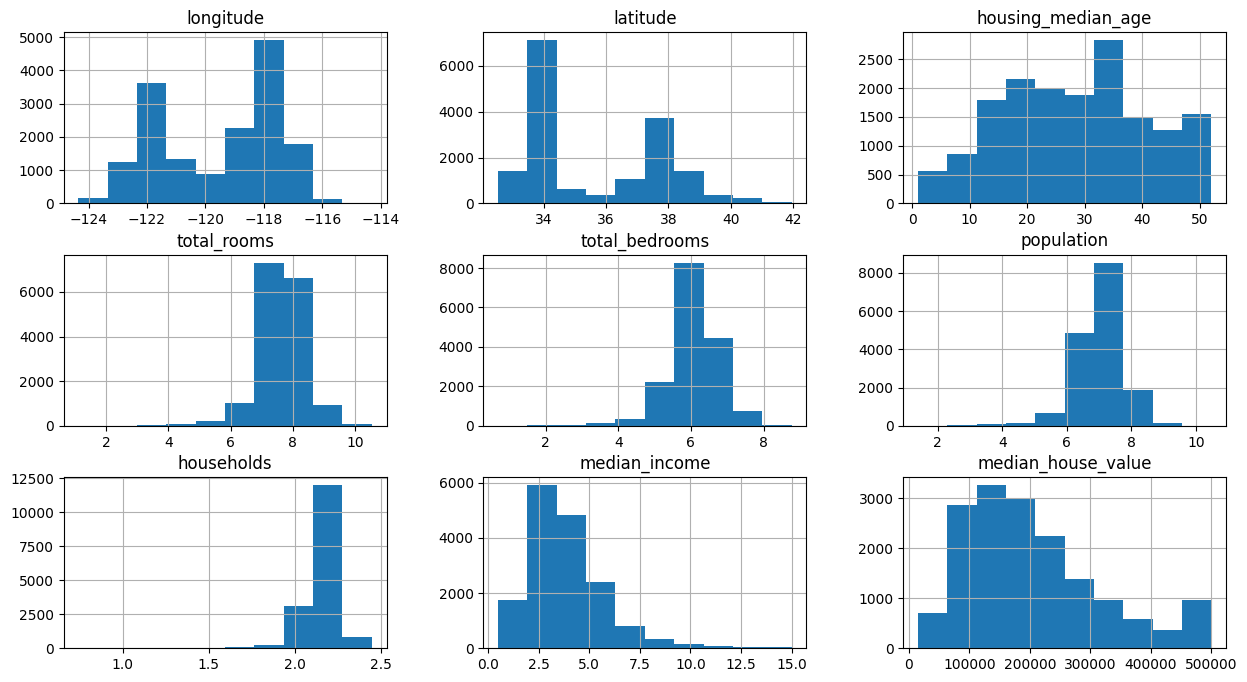

In [46]:
train_data.hist(figsize=(15,8))


In [47]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7230
INLAND        5214
NEAR OCEAN    2078
NEAR BAY      1821
ISLAND           3
Name: count, dtype: int64

In [48]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype='int')).drop(['ocean_proximity'],axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17310,-119.50,34.35,39.0,5.733341,3.663562,4.094345,1.907071,11.7794,500001.0,0,0,0,0,1
10835,-117.92,33.68,25.0,7.609862,6.120297,6.932448,2.152908,4.4732,245600.0,1,0,0,0,0
9294,-122.51,38.00,17.0,7.803843,6.285998,7.054450,2.175188,3.9519,274200.0,0,0,0,1,0
16489,-121.18,38.07,21.0,7.755339,5.934894,6.979145,2.169664,4.8125,161100.0,0,1,0,0,0
18103,-122.04,37.30,25.0,7.769379,6.035481,6.981935,2.171266,6.9238,345900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,-121.58,39.51,24.0,7.531552,5.921578,6.992096,2.143771,1.6389,56700.0,0,1,0,0,0
6998,-118.04,33.95,36.0,7.909489,6.246107,7.237778,2.187117,3.8214,178500.0,1,0,0,0,0
3057,-119.33,35.59,20.0,8.034631,6.539586,7.880804,2.201065,1.7868,54100.0,0,1,0,0,0
13600,-117.25,34.16,37.0,7.444249,5.631212,6.613384,2.133486,3.7188,116600.0,0,1,0,0,0


<Axes: >

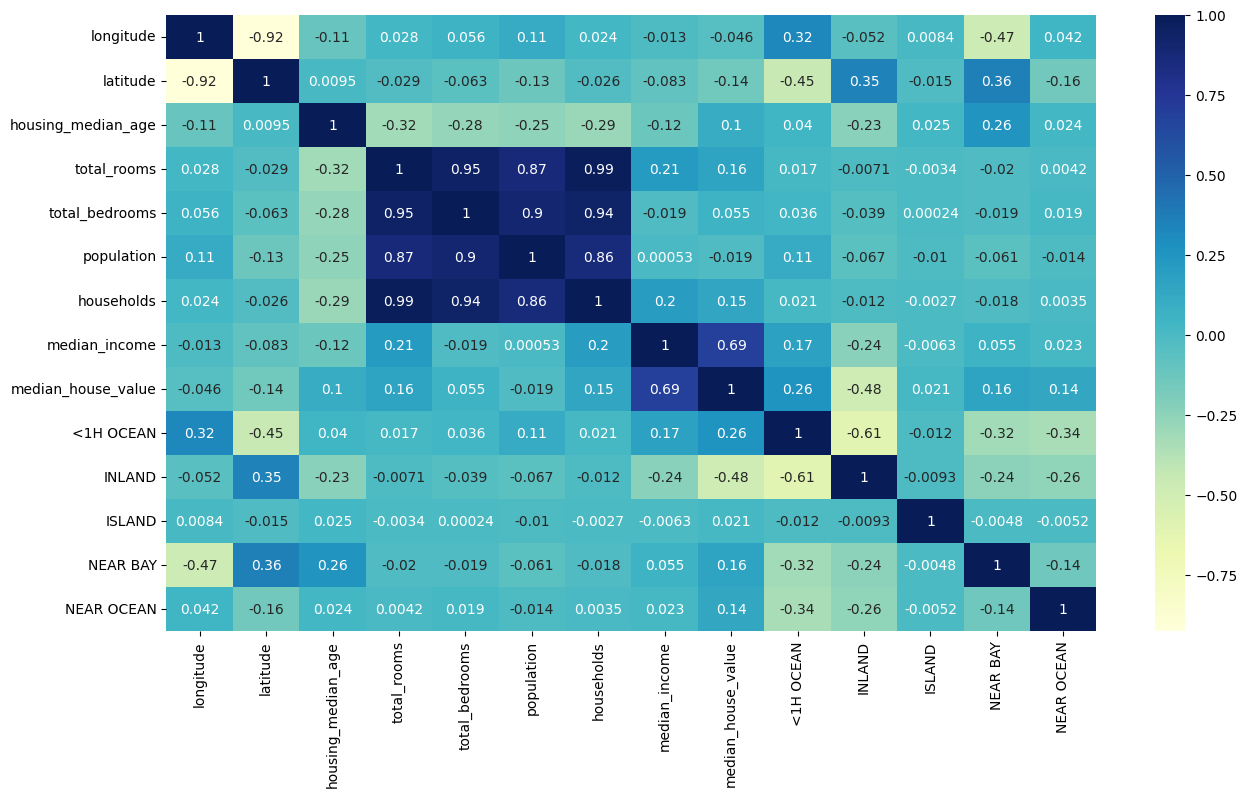

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns != 'ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

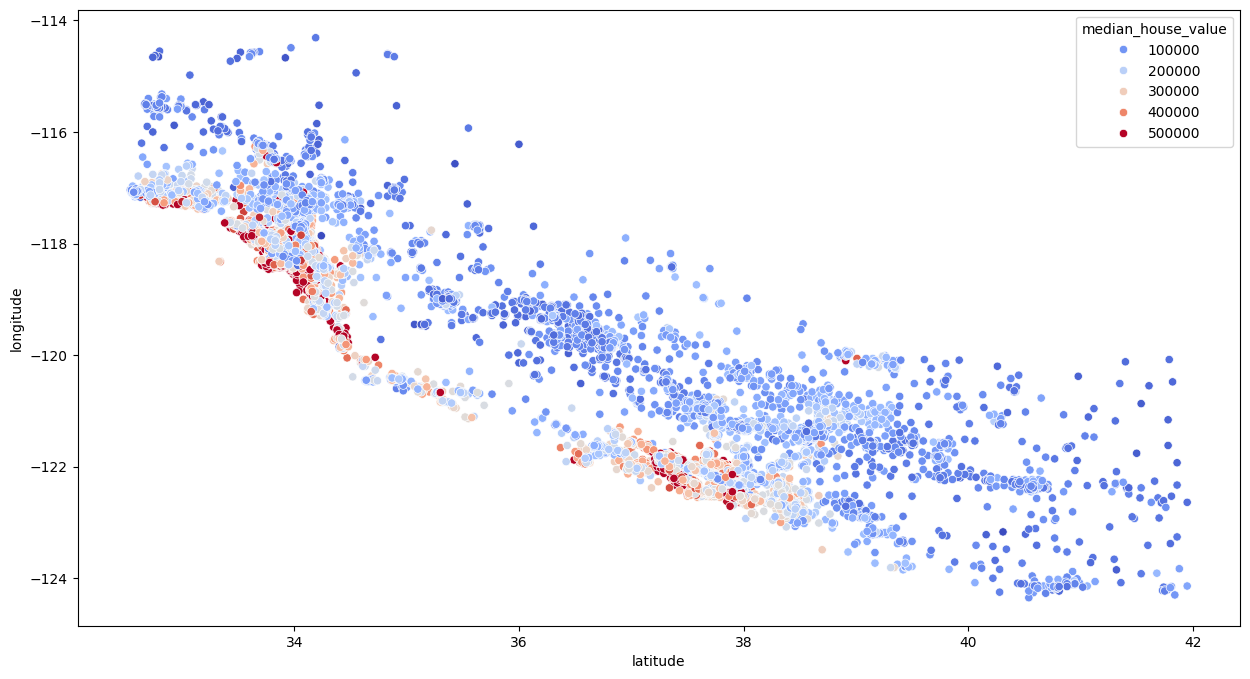

In [50]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude",  data=train_data, hue='median_house_value', palette="coolwarm")

<Axes: >

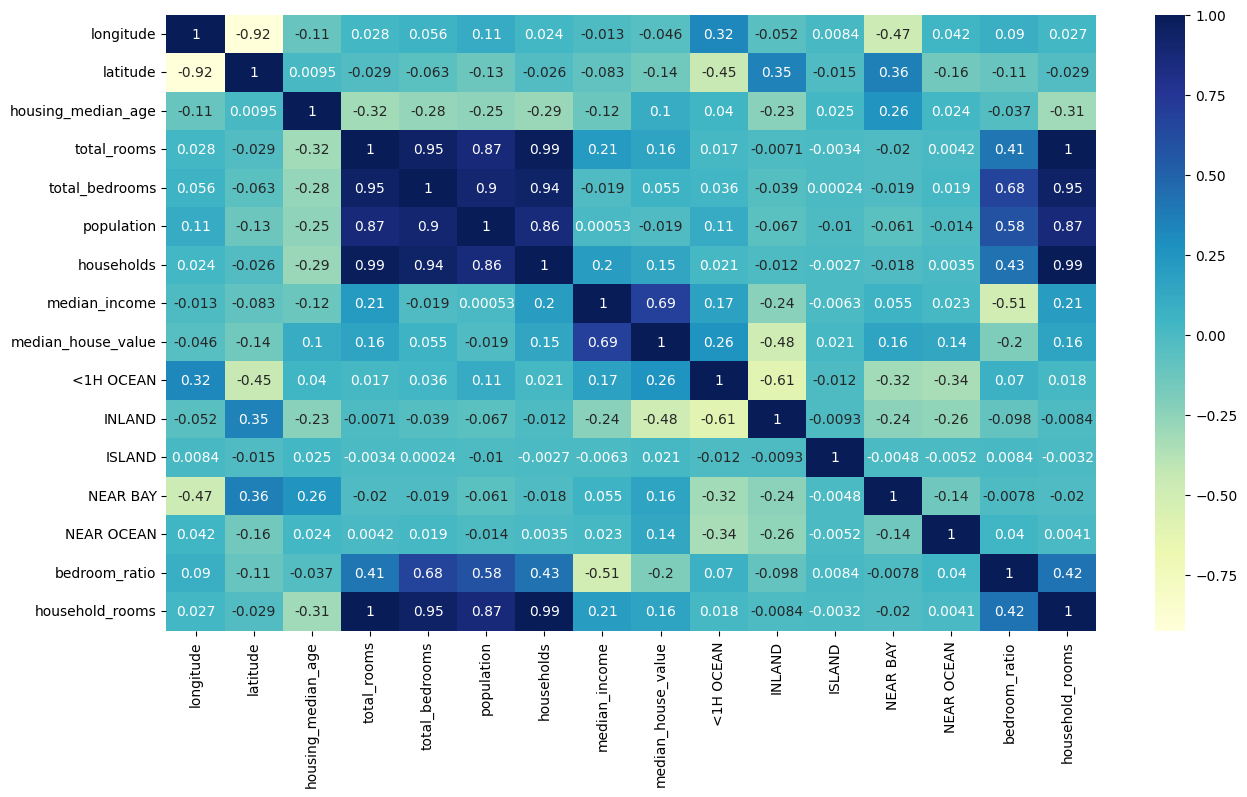

In [51]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns != 'ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

X_train_s=scaler


reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [53]:
import numpy as np
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['total_rooms'] + 1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype='int')).drop(['ocean_proximity'],axis=1)


test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18071,-122.01,37.28,22.0,7.620215,5.564520,6.651572,2.154110,9.1569,500001.0,1,0,0,0,0,0.730231,3.537524
4474,-118.16,34.08,43.0,7.329094,5.937536,7.199678,2.119755,3.2031,144600.0,1,0,0,0,0,0.810132,3.457520
17276,-119.69,34.41,44.0,7.097549,5.880533,6.403574,2.091561,2.6103,500000.0,1,0,0,0,0,0.828530,3.393421
8982,-118.43,34.00,37.0,7.201171,5.883322,6.916715,2.104277,3.7614,314300.0,1,0,0,0,0,0.816995,3.422159
4837,-118.29,34.03,42.0,7.427144,6.324359,7.649693,2.131458,1.9167,136400.0,1,0,0,0,0,0.851520,3.484537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15423,-117.26,33.20,13.0,8.059592,6.587550,7.424165,2.203824,2.8214,121900.0,1,0,0,0,0,0.817355,3.657094
18942,-122.08,38.30,2.0,8.812695,6.755769,7.607381,2.283677,6.8872,305200.0,0,1,0,0,0,0.766595,3.858994
8327,-118.30,33.94,36.0,7.621685,6.276643,7.237778,2.154281,2.0114,99300.0,1,0,0,0,0,0.823524,3.537926
17136,-122.16,37.45,50.0,5.283204,3.737670,4.343805,1.837880,7.6129,412500.0,0,0,0,1,0,0.707463,2.874618


In [56]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [57]:
reg.score(X_test, y_test)

0.665068656086828